In [ ]:
Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.  
Determine the number of clusters using the elbow method. 
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage

In [3]:
df=pd.read_csv('sales_data_sample.csv', encoding='latin1')
df=df.select_dtypes(include=['number']).copy()
df.dropna(inplace=True)

In [4]:
scaled=StandardScaler()
scale_data=scaled.fit_transform(df)

In [5]:
wcss=[]
K=range(1,11)
for k in K:
    km=KMeans(n_clusters=k,random_state=42,n_init=10)
    km.fit(scale_data)
    wcss.append(km.inertia_)

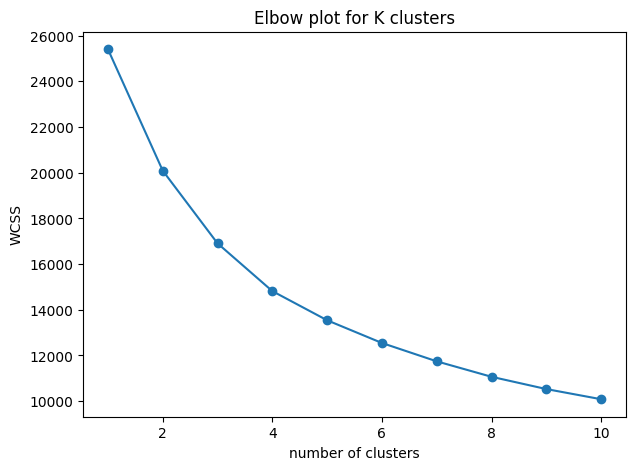

In [6]:
plt.figure(figsize=(7,5))
plt.plot(K,wcss,marker='o')
plt.title("Elbow plot for K clusters")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
k=3
kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)

In [8]:
clusters=kmeans.fit_predict(scale_data)
df['clusters']=clusters
print(df.head(8))

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  \
0        10107               30      95.70                2  2871.00       1   
1        10121               34      81.35                5  2765.90       2   
2        10134               41      94.74                2  3884.34       3   
3        10145               45      83.26                6  3746.70       3   
4        10159               49     100.00               14  5205.27       4   
5        10168               36      96.66                1  3479.76       4   
6        10180               29      86.13                9  2497.77       4   
7        10188               48     100.00                1  5512.32       4   

   MONTH_ID  YEAR_ID  MSRP  clusters  
0         2     2003    95         1  
1         5     2003    95         2  
2         7     2003    95         1  
3         8     2003    95         1  
4        10     2003    95         1  
5        10     2003    95         1  
6     

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(scale_data)

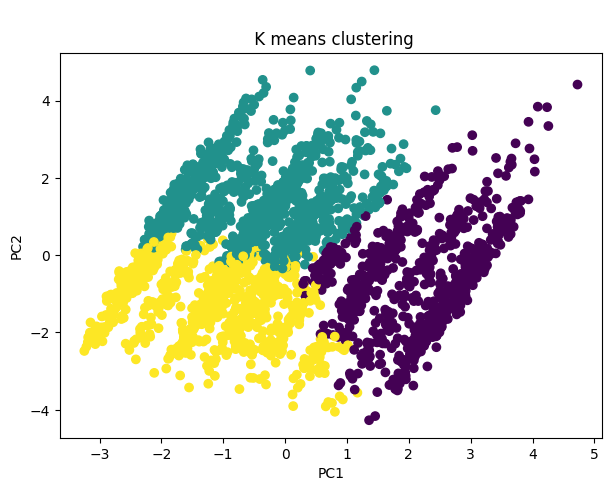

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(pca_data[:,0],pca_data[:,1],c=clusters)
plt.title("\n K means clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [11]:
linked=linkage(scale_data,method="ward")

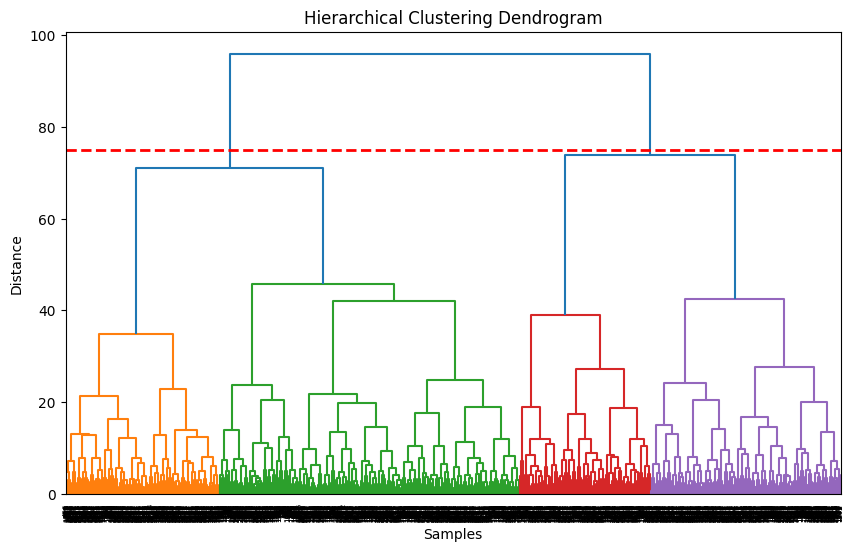

In [12]:
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.axhline(y=75,color="red",linestyle="--",linewidth=2)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()